In [2]:
import os
import sys
import inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
folder = "solvers"
hd_dir = currentdir.split(folder)[0]

if hd_dir not in sys.path:
    sys.path.insert(0, hd_dir)

# from env.equation.equation import Equation
print(hd_dir)

env_dir = os.path.join(hd_dir, 'spaces', 'math_space', "common")
print(env_dir)

if env_dir not in sys.path:
    sys.path.insert(0, env_dir)

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common


In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

In [4]:
from envs.hs.model.model_main import ModelNet as Model
from settings.settings_main import Settings

/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/
/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/spaces/math_space/common/


### Add model, connection and device to settings: 

In [5]:
# make settings:
prefix = hd_dir
modelFileName = '../../../../problems/1dTests/logistic_delays'
# modelFileName = '1dTests/logistic_delays'

model_path = '1dTests/logistic_delays'
conn_name = "conn_base"
device_conf_name = "default"

model = Model()
model.io.loadFromFile(modelFileName)
model.project_path = model_path
settings = Settings(model, conn_name, device_conf_name, "paths_hs_base", hd_prefix=prefix)


INFO:block_main.block_io:DefaultBound not set


Please enter password for user valdecar:
········


INFO:settings_main:device_conf_name
INFO:settings_main:default


In [14]:
block0 = model.blocks[0]
equation = model.equations[0]
model.paramValues

[{'a': 1, 'b': 2}]

In [6]:
print(model.project_path)
settings.paths['model']['path']

1dTests/logistic_delays


'1dTests/logistic_delays'

### Progress:

In [11]:
from solvers.hs.remoterun.progresses.progress_notebook import ProgressNotebook

In [12]:
progress = ProgressNotebook(100, prefix='solving')
display(progress.progress)

### Run solver:

In [13]:
from solvers.hs.remoterun.remoterun import remoteProjectRun

In [9]:
clear_output()
test_name = settings.paths['model']['name']
bTest = widgets.Button(description="run %s " % (test_name))
def run(event):
    remoteProjectRun(settings, 1, progress)
bTest.on_click(run)
display(progress.progress)
display(bTest)
display(progress.progress)

INFO:remoterun:project_path
INFO:remoterun:1dTests/logistic_delays
INFO:remoterun:project_name
INFO:remoterun:logistic_delays
INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.2)
INFO:paramiko.transport:Authentication (keyboard-interactive) successful!
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace exists...
INFO:remoterun:Workspace OK.
INFO:remoterun:Creating/cleaning project folder: 
INFO:remoterun:Folder cleaned.
INFO:remoterun:Creating settings folders: 
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/paths exists...
INFO:remoterun:folder /home/valdecar/projects/lab/workspace/settings/paths alredy exist
INFO:remoterun:Checking if folder /home/valdecar/projects/lab/workspace/settings/device_conf exists...
INFO:remoterun:folder /home/valdecar

### Results:

In [10]:
out_dir = os.path.join(hd_dir, 'problems', model_path, "out")
listdir = os.listdir(out_dir)
mp4 = [os.path.join(out_dir, file_name) for file_name in listdir
       if 'mp4' in file_name]

##### Video:

In [11]:
from functools import reduce

str_video = '''
<script>
</script>

<video controls>
'''
str_video = reduce(lambda acc, s: acc+s,
                   [(('<source src="%s" type="video/mp4">'
                      + '<p>Your browser doesnt support HTML5 video.'
                      + 'Here is a <a href="%s">') % (file_name, file_name)
                     + 'link to the video</a></p>')
                    for file_name in mp4], str_video)

str_video += '</video>'
# print(str_video)
# display(str_video)
display(HTML(str_video))


##### .out:

In [12]:
print(listdir)

outs = [os.path.join(out_dir, file_name)
        for file_name in listdir
        if '.out' in file_name]
print(outs)
with open(outs[0]) as f:
    data = f.read()

['logistic_delays-res0-U.out', 'logistic_delays_dom.txt', 'params_plot.txt', 'libuserfuncs.so', 'logistic_delays-plot0.mp4', 'logistic_delays.cpp', 'userfuncs.h', 'logistic_delays.sh', 'logistic_delays.dom']
['/home/valdecar/Documents/projects/projectsNew/lab/hybriddomain/problems/1dTests/logistic_delays/out/logistic_delays-res0-U.out']


In [13]:
lines = data.split('\n')
result = {}

for line in lines:
    if ':' in line:
        key, val = line.split(':')
        result[key]=val[1:]
    else:
        val = line
        result[key] += val

In [14]:
import re

In [15]:
def gen(reuslt):
    for key in reuslt:
        step_0 = re.subn(r'\.\s+',".0,",result[key])[0]
        step_1 = re.subn(r'\s+',",",step_0)[0]
        step_2 = step_1.replace('.]','.0]')
        step_3 = step_2.replace('[,','[')

        yield((key, eval(step_3)))

In [16]:
import numpy as np
result_t = dict([(float(key), val) for key, val in gen(result)])
time = [key for key in result_t]
result_x = np.array([result_t[key] for key in result_t]).T

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive


##### U(x, t-fixed):

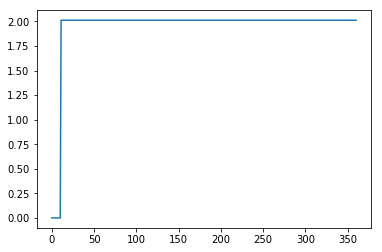

In [18]:
%matplotlib inline
def f(t):
    plt.plot(result_t[time[t]])
w = interactive(f,t=(0,100,1))
display(w)

##### U(x-fixed, t):

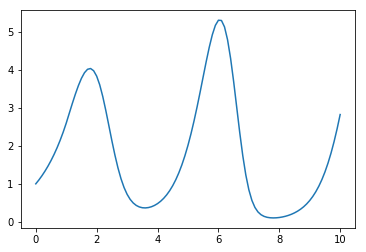

In [19]:
%matplotlib inline
def f(x):
    plt.plot(time, result_x[x])
w = interactive(f,x=(0,360,1))
display(w)